In [24]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [25]:
# Step 1: Load the dataset from CSV file
df = pd.read_csv('C:/Users/cogol/Desktop/Bank Project/Dataset/dataset.csv')

In [26]:
# Print the first 5 rows
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [27]:
# Step 2: Preprocess the data
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # You can use other strategies like mean or median
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [28]:
# Step 3: Split the dataset into training and testing sets
X = df_imputed.drop(columns=['Loan_Status'])
y = df_imputed['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Step 4: Train a machine learning model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7804878048780488


In [32]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'loan_approval_model.pkl')


['loan_approval_model.pkl']

In [58]:
import pandas as pd
import joblib

# Load the test data
test_data = pd.read_csv('C:/Users/cogol/Desktop/Bank Project/Dataset/test.csv')
# Load the trained model from the file
loaded_model = joblib.load('loan_approval_model.pkl')

# Preprocess the test data (assuming similar preprocessing as training data)
label_encoders = {}
imputer = SimpleImputer(strategy='most_frequent')

# Convert categorical variables to numerical using LabelEncoder
for column in test_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    test_data[column] = label_encoders[column].fit_transform(test_data[column])

# Handle missing values using SimpleImputer
test_data_imputed = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

# Make predictions on the test data
predictions = loaded_model.predict(test_data_imputed)

# Get the loan IDs for individuals predicted to get the loan
loan_ids_approved = test_data.loc[predictions == 1, 'Loan_ID']

# Print the loan IDs
print("Loan IDs for individuals predicted to get the loan:")
for loan_id in loan_ids_approved:
    print(loan_id)


Loan IDs for individuals predicted to get the loan:
2
3


In [1]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

# Step 1: Load the dataset from CSV file
df = pd.read_csv('C:/Users/cogol/Desktop/Bank Project/Dataset/dataset.csv')

# Print the first 5 rows
print("Original DataFrame:")
print(df.head())

# Step 2: Preprocess the data
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # You can use other strategies like mean or median
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 3: Split the dataset into training and testing sets
X = df_imputed.drop(columns=['Loan_Status'])
y = df_imputed['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply chi-square feature selection
# Initialize SelectKBest with chi2 as score function
selector = SelectKBest(chi2, k=5)  # Select top 5 features based on chi2 scores

# Fit selector to training data
selector.fit(X_train, y_train)

# Get selected feature indices
selected_features_indices = selector.get_support(indices=True)

# Get selected feature names
selected_features = X_train.columns[selected_features_indices]

# Subset the data with selected features
X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# Step 5: Train a machine learning model with selected features
model_selected = RandomForestClassifier(random_state=42)
model_selected.fit(X_train_selected, y_train)

# Step 6: Evaluate the model with selected features
y_pred_selected = model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision = precision_score(y_test, y_pred_selected)
recall = recall_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)
print("Precision:", precision)
print("Recall:", recall)
print("Using RandomForest")
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_selected))

# Step 7: Save the model with selected features
joblib.dump(model_selected, 'loan_approval_model_selected.pkl')


Original DataFrame:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  


['loan_approval_model_selected.pkl']

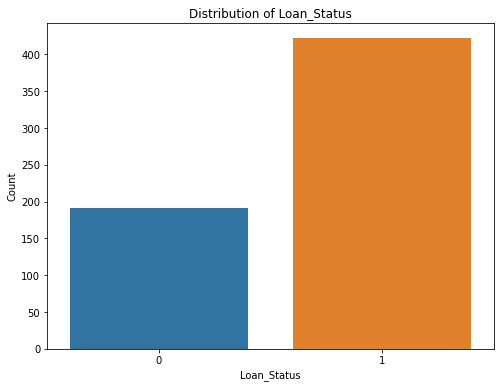

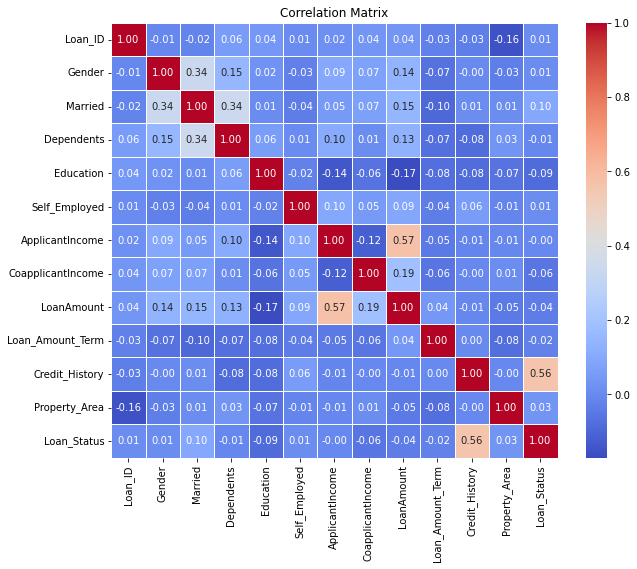

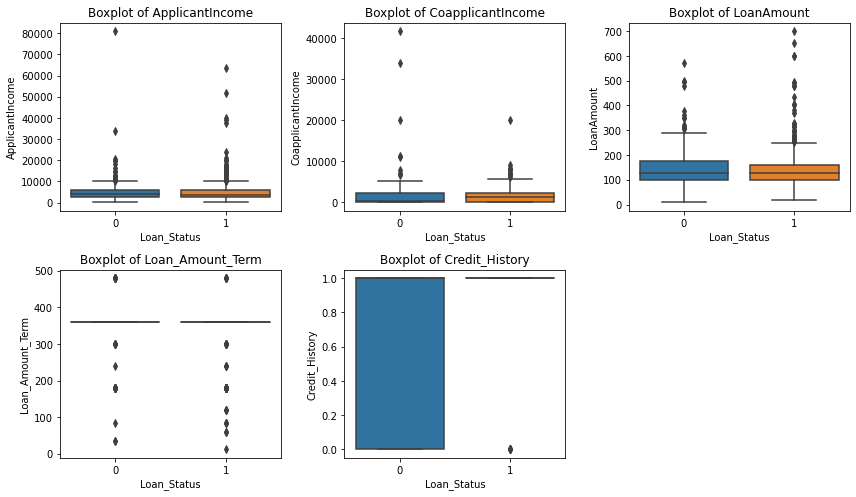

ValueError: num must be 1 <= num <= 9, not 10

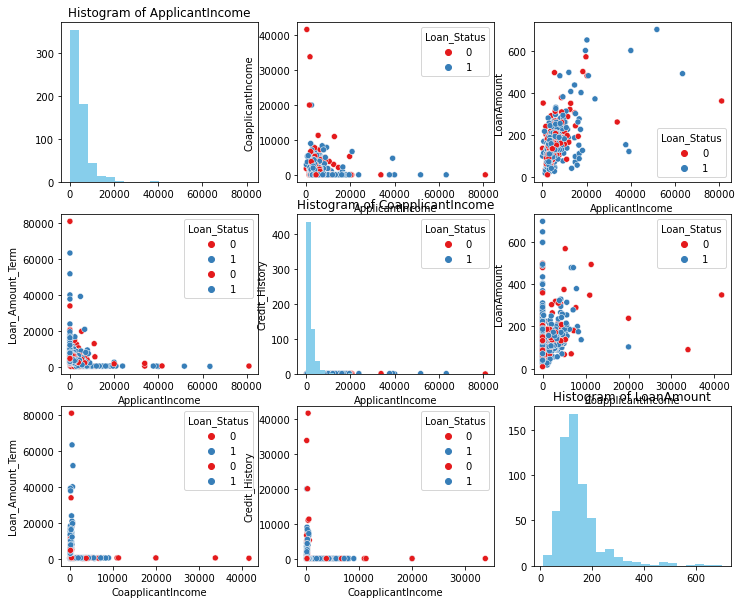

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution of Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plotting boxplots for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Loan_Status', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Plotting scatter plots for numerical features
plt.figure(figsize=(12, 10))
for i, feature1 in enumerate(numerical_features, 1):
    for j, feature2 in enumerate(numerical_features, 1):
        plt.subplot(3, 3, i * 3 + j - 3)
        if i != j:
            sns.scatterplot(x=feature1, y=feature2, hue='Loan_Status', data=df, palette='Set1')
        else:
            plt.hist(df[feature1], bins=20, color='skyblue')
            plt.title(f'Histogram of {feature1}')
plt.tight_layout()
plt.show()
